In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
plt.style.use('fivethirtyeight')
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

In [21]:
happy17=pd.DataFrame(pd.read_csv('CSVs/Happiness_2017.csv'))
suicide=pd.DataFrame(pd.read_csv('CSVs/share-deaths-suicide.csv'))
happy17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [22]:
suicide17 = suicide[suicide['Year']==2017]
suicide17 = suicide17.dropna(how='any')
suicide17 = suicide17.rename(columns = {'Entity':'Country'})
suicide17.head()

,Country,Code,Year,Deaths - Self-harm - Sex: Both - Age: All Ages (Percent) (%)
27,Afghanistan,AFG,2017,0.761195
55,Albania,ALB,2017,0.744028
83,Algeria,DZA,2017,1.011559
111,American Samoa,ASM,2017,1.062879
167,Andorra,AND,2017,1.463047


In [23]:
happy19=pd.read_csv('CSVs/country_iso.csv')
happy1719=pd.merge(happy19,happy17, on='Country', how='inner')
happy1719 = happy1719.drop(['Unnamed: 0'], axis=1)
happy1719 = happy1719.rename(columns = {'Happiness score':'2019 Happiness Score', 'Happiness.Score':'2017 Happiness Score',
                                       'iso_a3':'Code'})
happy1719.head()

,Country,2019 Happiness Score,Code,Happiness.Rank,2017 Happiness Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Finland,7.769,FIN,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
1,Denmark,7.600,DNK,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Norway,7.554,NOR,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
3,Iceland,7.494,ISL,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
4,Netherlands,7.488,NLD,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804


In [24]:
happy_suicide = pd.merge(happy1719, suicide17, on='Code', how='inner')
happy_suicide.head()

,Country_x,2019 Happiness Score,Code,Happiness.Rank,2017 Happiness Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Country_y,Year,Deaths - Self-harm - Sex: Both - Age: All Ages (Percent) (%)
0,Finland,7.769,FIN,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Finland,2017,1.576410
1,Denmark,7.600,DNK,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Denmark,2017,1.281387
2,Norway,7.554,NOR,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Norway,2017,1.409336
3,Iceland,7.494,ISL,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Iceland,2017,1.810336
4,Netherlands,7.488,NLD,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,Netherlands,2017,1.358551


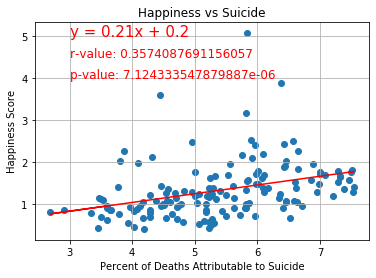

R-value: 0.3574087691156057, P-value: 7.124333547879887e-06


In [38]:
#Linear Regression!
x_values=happy_suicide['2017 Happiness Score']
y_values=happy_suicide['Deaths - Self-harm - Sex: Both - Age: All Ages (Percent) (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Happiness vs Suicide')
plt.xlabel('Percent of Deaths Attributable to Suicide')
plt.ylabel('Happiness Score')
r_value=(f"r-value: {rvalue}")
p_value=(f"p-value: {pvalue}")
plt.annotate(line_eq,(3,5),fontsize=15,color="red")
plt.annotate(r_value,(3,4.5),fontsize=12,color="red")
plt.annotate(p_value,(3,4),fontsize=12,color="red")
plt.grid()
plt.savefig('Images/suicide.png')
plt.show()
print(f"R-value: {rvalue}, P-value: {pvalue}")

In [27]:
#Moderate correlation!
len(happy_suicide)

150

In [33]:
import geopandas 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'iso_a3':'Code'}) 
world = pd.merge(world, happy_suicide, on='Code', how='inner')
world.head()

,pop_est,continent,name,Code,gdp_md_est,geometry,Country_x,2019 Happiness Score,Happiness.Rank,2017 Happiness Score,...,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Country_y,Year,Deaths - Self-harm - Sex: Both - Age: All Ages (Percent) (%)
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,3.231,153,3.349,...,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,Tanzania,2017,0.770293
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,7.278,7,7.316,...,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,Canada,2017,1.651978
2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,6.892,14,6.993,...,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2.218113,United States,2017,1.707624
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,5.809,60,5.819,...,1.284556,1.384369,0.606042,0.437454,0.201964,0.119283,1.784893,Kazakhstan,2017,3.166981
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,6.174,47,5.971,...,0.786441,1.548969,0.498273,0.658249,0.415984,0.246528,1.816914,Uzbekistan,2017,1.478298


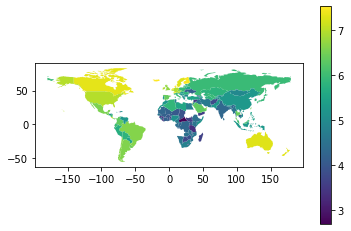

In [36]:
fig, ax = plt.subplots(1, 1)
world.plot(column='2017 Happiness Score', ax=ax, legend=True)
plt.savefig('Images/Happiness Map 2017.png')

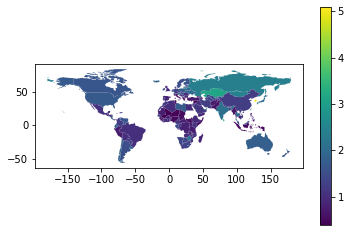

In [42]:
fig, ax = plt.subplots(1,1)
world.plot(column='Deaths - Self-harm - Sex: Both - Age: All Ages (Percent) (%)', ax=ax, legend=True)
plt.savefig('Images/suicide map 2017.png')

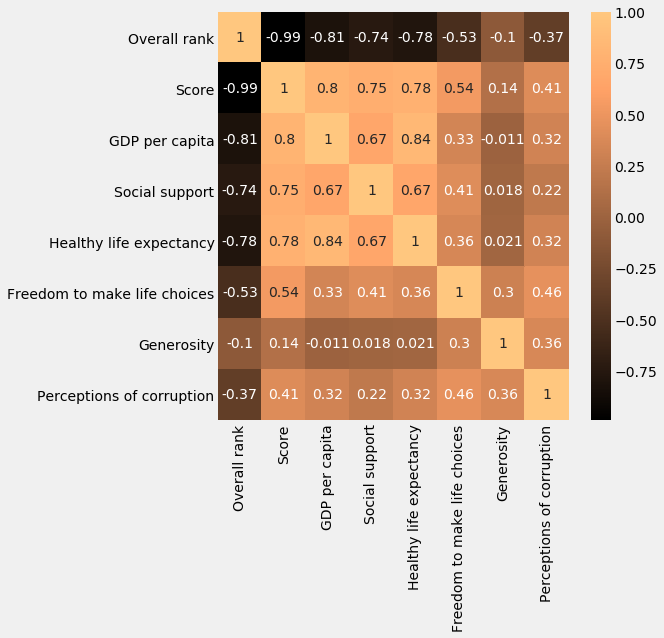

In [54]:
import seaborn as sns
happiness_2018=pd.read_csv('CSVs/Happiness_2018.csv')
plt.rcParams['figure.figsize'] = (7, 7)
sns.heatmap(happiness_2018.corr(), cmap = 'copper', annot = True)
plt.savefig('Images/2018 Happines Correlations')
plt.show()
#source:(https://www.kaggle.com/roshansharma/world-happiness-report)

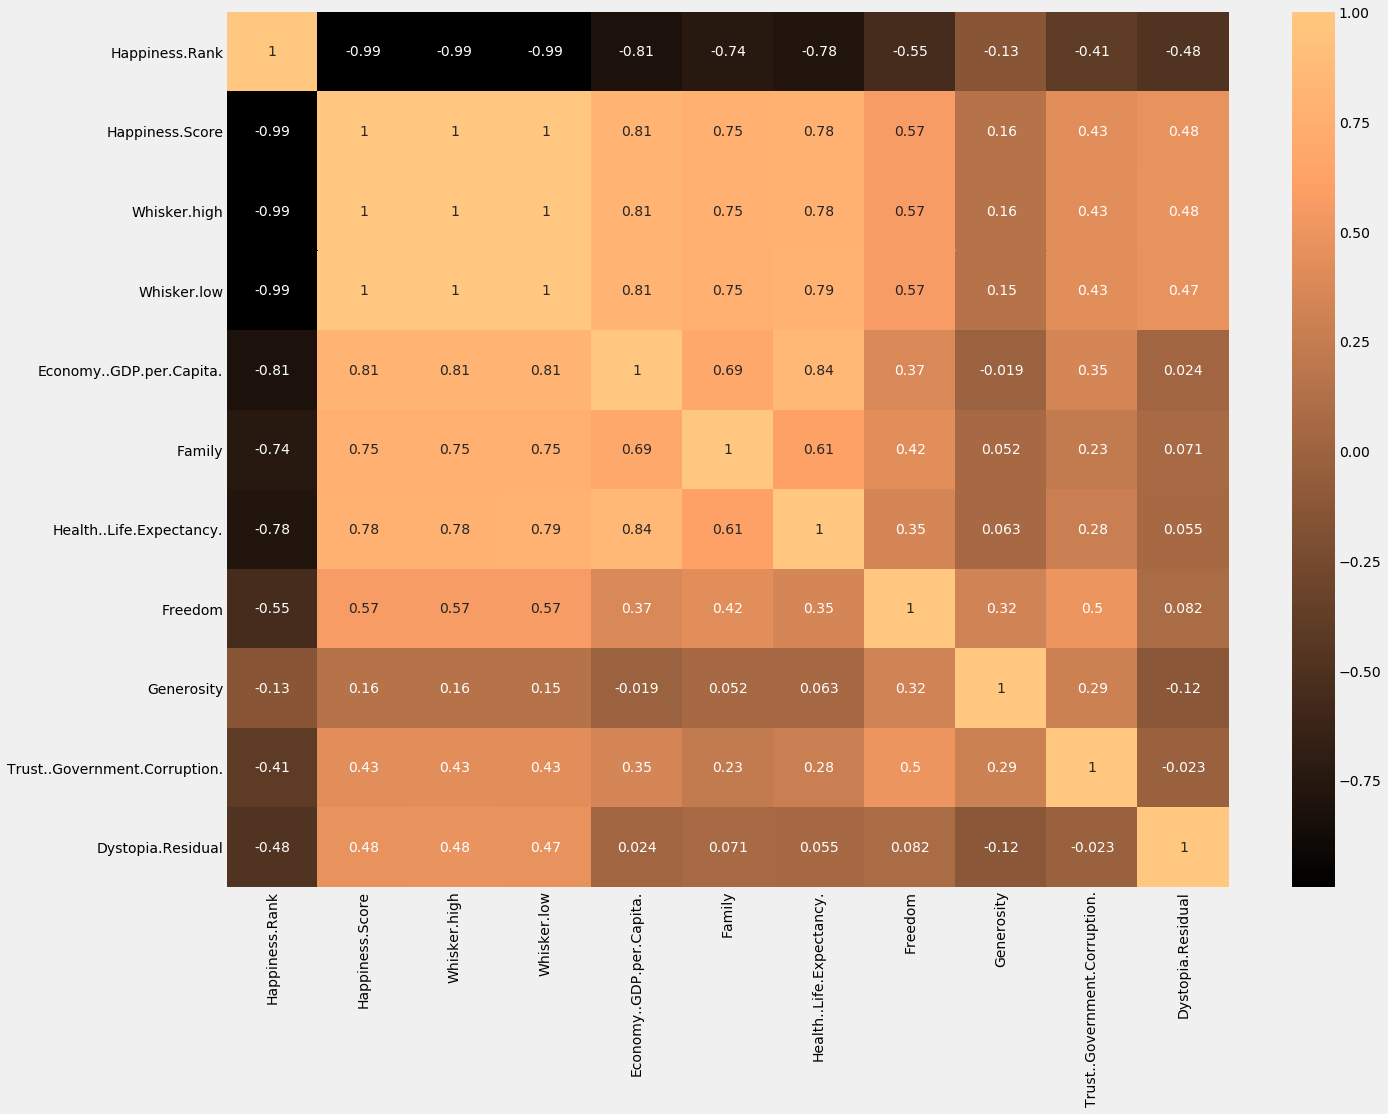

In [58]:
happiness_2017=pd.read_csv('CSVs/Happiness_2017.csv')
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(happiness_2017.corr(), cmap = 'copper', annot = True)
plt.savefig('Images/2017 Happines Correlations')
plt.show()
#source:(https://www.kaggle.com/roshansharma/world-happiness-report)

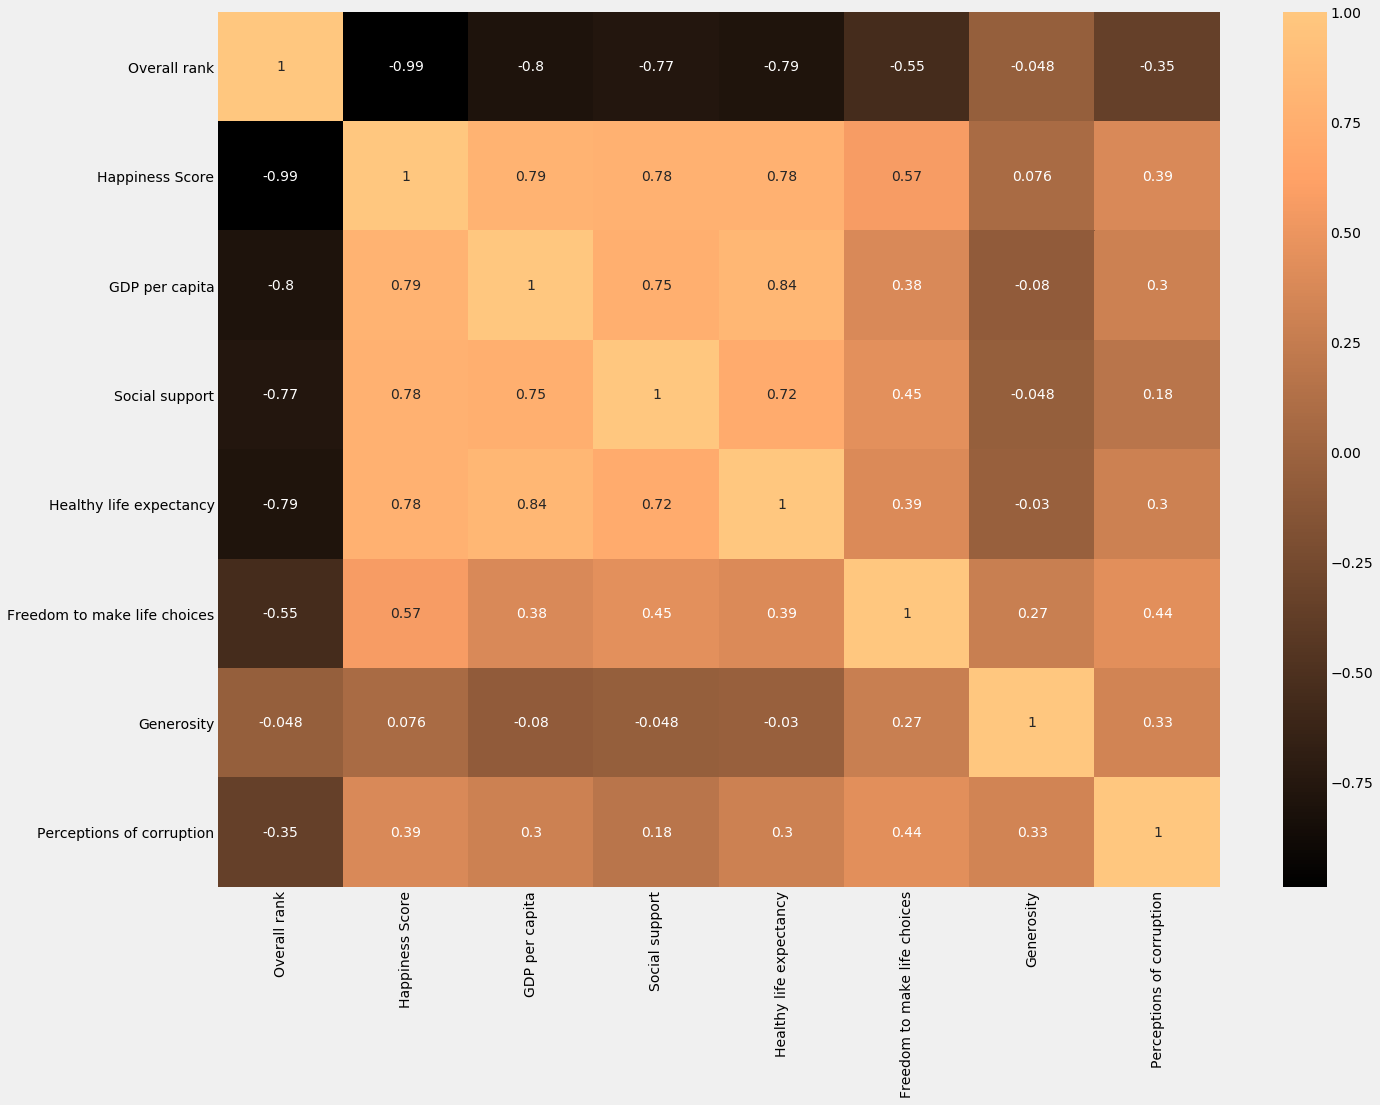

In [59]:
happiness_2019=pd.read_csv('CSVs/happiness_2019.csv')
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(happiness_2019.corr(), cmap = 'copper', annot = True)
plt.savefig('Images/2019 Happines Correlations')
plt.show()
#source:(https://www.kaggle.com/roshansharma/world-happiness-report)